Gold has always held a prominent place in the country’s economy and among the people. Gold prices have historically skyrocketed, peaking at $ 1,800 in 2020. These swings that gold has faced can be attributed to several events that occurred during the period. Stock prices are strongly correlated with public information and world events, and gold has no exception.

Unlike other financial assets, precious metals behave positively in times of crisis. Indeed, in the face of events such as epidemics, wars and economic disruption, most assets experience a decline in their value. However, in search of cover, investors are turning their attention to gold. As a result, the demand for yellow metal increases, resulting in a rise in the market valuation.

Gold tends to be viewed as a strategic and tactical investment asset when considering portfolio diversification. However, economic and financial aspects are not the only factors that can affect gold prices. Geopolitical factors may also influence the valuation of the yellow metal’s market.

**Indeed**, show that faced with geopolitical risks, gold acts as a safe haven. In fact, he has an affirmative reaction in times of threats resulting from geopolitical and international tensions.

By analyzing financial, geopolitical and global data on natural disasters, it is possible to predict future fluctuations in the price of gold, which will allow investors to improve the management of their portfolio in the face of unexpected movements of the market.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("gold_price.csv",parse_dates=True,index_col='Date')
df.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [3]:
df.index.dtype

dtype('<M8[ns]')

Now let’s do some data preparation to fit the data properly in our machine learning model:

In [4]:
df['Return'] = df['USD (PM)'].pct_change() * 100 # Percentage change between the current and a prior element.
df['Lagged_Return'] = df.Return.shift() # When `freq` is not passed, shift the index without realigning the data.

In [5]:
df = df.dropna()

In [6]:
train = df['2001':'2018']
test = df['2019']

In [7]:
# Create train and test sets for dependent and independent variables
X_train = train["Lagged_Return"].to_frame()
y_train = train["Return"]
X_test = test["Lagged_Return"].to_frame()
y_test = test["Return"]

We have prepared the data to fit in a machine learning model. Lets train the model using **Linear Regression** algorithm:

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Now let’s plot the results of gold price prediction that we got from the linear regression algorithm:

In [9]:
out_of_sample_results = y_test.to_frame()

# Add a column of "out-of-sample" predictions to that dataframe:  
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

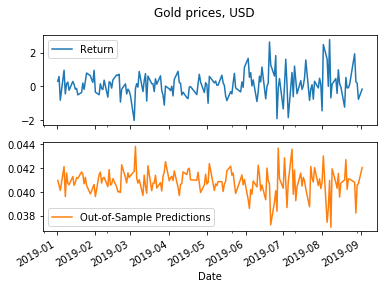

In [10]:
out_of_sample_results.plot(subplots=True, title='Gold prices, USD')
plt.show()